# Advanced Chemical Reaction Engineering
## Homework 1
## Due September 1st, 2021
Solve each problem on separate sheets of paper, and clearly indicate the problem number and your name on each. Carefully and neatly document your answers. You may use a mathematical solver like Jupyter/iPython. Use plotting software for all plots.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

$$\require{mhchem}$$    

# 1: All in balance
**1.1: One way under consideration for removing harmful "NO<sub>x</sub>" (NO + NO<sub>2</sub>) from flue gas is the thermal deNOx process, in which NH<sub>3</sub> is used to reduce the NO to NO<sub>2</sub>:**

$\ce{{\_}NO(g) + {\_}O2(g) + {\_}NH3(g) -> {\_}N2(g) + {\_}H2O(g)}$

The research lab has several gas tanks available to study this reaction, including one containing 2.0% NO in an N<sub>2</sub> diluent, one containing 10% O<sub>2</sub> in an N<sub>2</sub> diluent, and a bottle of 4% anhydrous ammonia in N<sub>2</sub>. You can assume all gases behave ideally.

### 1. Balance the thermal deNOx reaction, assuming each NH<sub>3</sub> titrates one NO.

$\ce{2NO(g) + 1/2O2(g) + 2NH3(g) -> 2N2(g) + 3H2O(g)}$

### 2. What mass flow rates are necessary to create a stoichiometric mixture at 1 bar total pressure, 400ºC, and 10L/s total volumetric flow rate?

In [19]:
# Ideal Gas Law: PV=nRT
R = .0831451 #L bar K-1 mol-1
P = 1 #bar
V = 10 #L/s
T = 673 #K
n = round((P*V)/(R*T),2) #moles/s
print('Total Molar Flow Rate =',n,'moles/s')

'''
First find the molar flow ratio of each of the tanks.
Solve the system of equations:
.02*tank1 + 0*tank2 + 0*tank3 = 2.   NO balance
0*tank1 + 0.1*tank2 + 0*tank3 = .5  O2 balance
0*tank1 + 0*tank2 + 0.04*tank3 = 2.  NH3 balance

tank1 = 100.  # mol/s
tank2 = 5.    # mol/s
tank3 = 50.   # mol/s

total = 155.  # mol/s
ratios:
tank1 = 100/155.  # fractional mol/s
tank2 = 5/155
tank3 = 50/155
'''


# Molar flow rate ratio for each tank
no_n2_tank_ratio = 100/155.      
o2_n2_tank_ratio = 5/155
nh3_n2_container_ratio = 50/155

'''
Multiply those ratios by total molar flow rate 
to find rate coming from each tank.
'''

# Molar flow rate for each tank
no_n2_molar_flow = no_n2_tank_ratio*n
o2_n2_molar_flow = o2_n2_tank_ratio*n
nh3_n2_molar_flow = nh3_n2_container_ratio*n

# average mass of each tank
no_n2_average_mass = .02*30.01+.98*28.0134 #g/mole
o2_n2_average_mass = .1*15.999*2. + .9*28.0134
nh3_n2_average_mass = .04*17.031 + .96*28.0134

# mass flow rate of each tank
no_n2_mass_flow = no_n2_molar_flow * no_n2_average_mass
o2_n2_mass_flow = o2_n2_molar_flow * o2_n2_average_mass
nh3_n2_mass_flow = nh3_n2_molar_flow * nh3_n2_average_mass


print('Molar Flow Ratios From Each Tank:')
print('Tank 1: ',no_n2_tank_ratio)
print('Tank 2: ',o2_n2_tank_ratio)
print('Tank 3: ',nh3_n2_container_ratio)

print('Molar Flow Rate From Each Tank:')
print('Tank 1: ',no_n2_molar_flow,'moles/s')
print('Tank 2: ',o2_n2_molar_flow,'moles/s')
print('Tank 3: ',nh3_n2_molar_flow,'moles/s')
print('--------------------------------')
print('Mass Flow Rate From Each Tank')
print('Tank 1: ',no_n2_mass_flow,'g/s')
print('Tank 2: ',o2_n2_mass_flow,'g/s')
print('Tank 3: ',nh3_n2_mass_flow,'g/s')

Total Molar Flow Rate = 0.18 moles/s
Molar Flow Ratios From Each Tank:
Tank 1:  0.6451612903225806
Tank 2:  0.03225806451612903
Tank 3:  0.3225806451612903
Molar Flow Rate From Each Tank:
Tank 1:  0.11612903225806451 moles/s
Tank 2:  0.005806451612903225 moles/s
Tank 3:  0.058064516129032254 moles/s
--------------------------------
Mass Flow Rate From Each Tank
Tank 1:  3.2578062967741936 g/s
Tank 2:  0.16497209032258064 g/s
Tank 3:  1.6010770064516127 g/s


### 3. Plot the molar flow rates of all five gases as a function of reaction advancement.

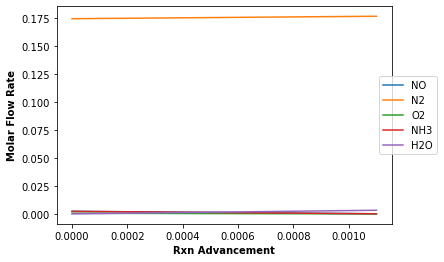

In [20]:
# Set up a vector to store advancement values
# We don't know max advancement yet, unless you calculated it already
# I will brute force it and just find when the first reactant hits 0
adv = np.arange(0,1,.0001)

# calculate flow of each species using advancement and stoichiometric
# coefficient 
no = no_n2_molar_flow*.02 - 2*adv
o2 = o2_n2_molar_flow*.1 - 1/2*adv
nh3 = nh3_n2_molar_flow*.04 - 2*adv
n2 = no_n2_molar_flow*.98 + o2_n2_molar_flow*.9 + nh3_n2_molar_flow*.96 + adv*2
h2o = 0+3*adv

total = no+o2+nh3+n2+h2o


# Here we find the max advancement
# Once we know that, cut all vectors to that value
max_adv = min([np.where(no<0)[0][0],np.where(o2<0)[0][0],np.where(nh3<0)[0][0]])
no = no[:max_adv]
o2 = o2[:max_adv]
nh3 = nh3[:max_adv]
n2 = n2[:max_adv]
h2o = h2o[:max_adv]
adv = adv[:max_adv]

total = total[:max_adv]

# Plot everything
plt.plot(adv,no,label='NO')
plt.plot(adv,n2,label='N2')
plt.plot(adv,o2,label='O2')
plt.plot(adv,nh3,label='NH3')
plt.plot(adv,h2o,label='H2O')
plt.legend(loc='center right',bbox_to_anchor=(1.15,0.5),ncol=1)
plt.xlabel('Rxn Advancement',weight='bold')
plt.ylabel('Molar Flow Rate',weight='bold')
plt.show()

### 4. Plot the total volumetric flow rate as a function of reaction advancement.

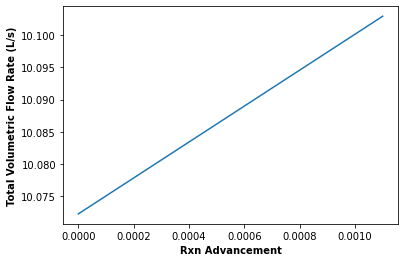

In [21]:
# convert total molar flow rate to volume flow rate
vtot = total*R*T/P

# plot it
plt.plot(adv,vtot)
plt.xlabel('Rxn Advancement',weight='bold')
plt.ylabel('Total Volumetric Flow Rate (L/s)',weight='bold')
plt.show()

**1.2: NH<sub>3</sub> oxidation is an undesirable side-reaction of thermal deNOx:**

$\ce{{\_}NH3(g) + {\_}O2(g) -> {\_}NO(g) + {\_}H2O(g)}$

### 1. Balance the NH<sub>3</sub> oxidation reaction.

$\ce{4NH3(g) + 5O2(g) -> 4NO(g) + 6H2O(g)}$

### 2. Under the stoichiometric conditions described above, the reactor generates 0.036 g/s NO and 0.017 g/s N<sub>2</sub>. How effectively is the NH<sub>3</sub> being used for thermal deNOx? (*Hint:* What are the advancements of the two reactions?)

CLASS: There was an error in the problem statement. "N2" was supposed to be "NH3." If N2, one would convert the N2 mass flow rate to molar flow rate and read the advancement of reaction 1 off of the plot from above. Similarly convert NO mass flow rate to molar, use the advancement from reaction 1 to determine its contribution to the NO molar flow rate, then attribute the difference to the advancement of reaction 2. In the NH3 case, one would write mass balances on both NO and NH3 in terms of advancements and solve both simultaneously. Much more interesting! Eg, FNH3 = FNH30 - 2 xi1 - 4 xi2. I encourage you to try it!

# 2: NOx, NOx, who's there?
**2.1 A Simpler and confounding reaction NO is it's oxidation to NO<sub>2</sub>:**

$\ce{{\_}NO(g) + {\_}O2(g) -> {\_}NO2(g)}$

You can assume all gases behave ideally under the conditions considered in this problem.

### 1. Determine $\Delta Hº$(298K), $\Delta Sº$(298K), $\Delta Gº$(298K), and $K_p$(298K) for the NO oxidation reaction. Be sure to specify your source and the standard state.

In [22]:
# data source: https://www2.chem.wisc.edu/deptfiles/genchem/netorial/modules/thermodynamics/table.htm
# standard state 298.15K

no_h = 90.25    #kJ/mol
no_s = .21076   #kJ/mol*K
no_g = 86.55    #kJ/mol

o2_h = 0
o2_s = .205138
o2_g = 0

no2_h = 33.18
no2_s = .24006
no2_g = 51.31

h_rxn = 2*no2_h - o2_h - 2*no_h
s_rxn = 2*no2_s - o2_s - 2*no_s
g_rxn = 2*no2_g - o2_g - 2*no_g

print('∆H(298) = ',h_rxn, 'kJ/mol')
print('∆S(298) = ',s_rxn, 'kJ/mol*K')
print('∆G(298) = ',g_rxn, 'kJ/mol')

∆H(298) =  -114.14 kJ/mol
∆S(298) =  -0.146538 kJ/mol*K
∆G(298) =  -70.47999999999999 kJ/mol


In [23]:
# ∆G = -RTln(Kp)
# ∆G = ∆H - T∆S
# -RTln(Kp) = ∆H - T∆S
# Kp = e^-((∆H - T∆S)/(RT))
R = 8.314
Kp = np.exp(-(h_rxn*1000-298.15*s_rxn*1000)/(R*298.15))
print('Kp = ',Kp)

Kp =  2202619066232.3994


### 2. Calculate the equilibrium partial pressure ratio of NO<sub>2</sub> to NO in the atomosphere near the surface of the earth. Assume the mixing ratio of O<sub>2</sub> to be 0.2 and a temperature of 25ºC.

In [24]:
PO2 = 0.2 * 1 #atm
# (PNO2)^2/(PNO)^2*PO2 = Kp 
# PNO2/PNO = sqrt(Kp*PO2)

Pressure_ratio = np.sqrt(Kp*PO2)
print('The pressure ratio is: ',Pressure_ratio)

The pressure ratio is:  663719.6797191416


### 3. From standard compilations and at 1 atm standard state, $\Delta Hº$(250) = -116.532 kJ mol<sup>-1</sup> and $\Delta Sº$(250) = -152.179J/mol/K. Use the van't Hoff relationship to plot $\Delta Gº(T)$ vs T from room temperature to 1000ºC. Add a point on your plot for the $\Delta Gº$(298K) you found from a tabulation.

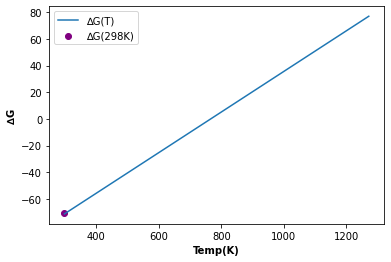

In [25]:
# ∆G = ∆H - T∆S
h_250 = -116.532
s_250 = -.152179
temp = np.arange(298,1273)
dg = h_250-temp*s_250
plt.plot(temp,dg,label='∆G(T)')
plt.scatter(298,g_rxn,color='purple',label='∆G(298K)')
plt.legend()
plt.xlabel('Temp(K)',weight='bold')
plt.ylabel('∆G',weight='bold')
plt.show()

### 4. NO oxidation is catalyzed over diesel oxidation catalysts (DOCs) on diesel vehicles. Plot the equilibrium conversion of NO to NO<sub>2</sub> vs T from room temperature to 1000ºC for an isobaric 1 atm reactor presented with 0.1% NO and 5% O<sub>2</sub>, and balance N<sub>2</sub>.

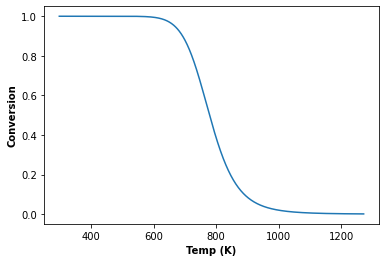

In [26]:
# Conversion = Xc = K(T)/(1+K(T))
# K(T) = e^-((∆H - T∆S)/(RT))

temp = np.arange(298,1273)
Kp_t = np.exp(-(h_rxn*1000-temp*s_rxn*1000)/(R*temp))
o2 = .05
no = .001

xc = Kp_t/(1+Kp_t)
plt.plot(temp,xc)
plt.xlabel('Temp (K)',weight='bold')
plt.ylabel('Conversion',weight='bold')
plt.show()